In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 디버깅 모듈 설치
import pdb

# 우리가 사용할 컴퓨터를 check하는 부분, cpu/gpu 지원받을지...
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# 1) 물리적인 위치에 데이터 저장... 다운로드(training/ test)
train_dataset = torchvision.datasets.MNIST(root='../../data/', # 데이터셋이 저장되는 물리적 위치
                                             train = True, # train dataset만
                                             transform = transforms.ToTensor(), # 중요!!
                                             download = True # 다운로드가 root에 진행됨
                                            )
test_dataset = torchvision.datasets.MNIST(root='../../data/', # 데이터셋이 저장되는 물리적 위치
                                             train = False, # test dataset만
                                             transform = transforms.ToTensor(), 
                                            )

# 2) DataLoader...BatchSize를 이용함
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)

Convolution NeuralNet Model 생성

In [ ]:
class ConvNet(nn.Module):
  def __init__(self, num_classes=10):
    super(ConvNet, self).__init__()
    self.layer1= nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
        nn.ReLU())
    self.layer2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.layer3 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2))
    self.layer4 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.layer5 = nn.Linear(7*7*32, num_classes)
  
  def forward(self, x):

   # pdb.set_trace() #2

    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = out.reshape(out.size(0),-1)
    out = self.layer5(out)

    return out

In [ ]:
model = ConvNet(num_classes).to(device)


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    #pdb.set_trace() #1

    outputs = model(images)

    #pdb.set_trace() #3

    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2612
Epoch [1/5], Step [200/600], Loss: 0.2086
Epoch [1/5], Step [300/600], Loss: 0.0643
Epoch [1/5], Step [400/600], Loss: 0.1246
Epoch [1/5], Step [500/600], Loss: 0.0850
Epoch [1/5], Step [600/600], Loss: 0.0862
Epoch [2/5], Step [100/600], Loss: 0.0628
Epoch [2/5], Step [200/600], Loss: 0.1217
Epoch [2/5], Step [300/600], Loss: 0.0762
Epoch [2/5], Step [400/600], Loss: 0.0252
Epoch [2/5], Step [500/600], Loss: 0.0197
Epoch [2/5], Step [600/600], Loss: 0.0518
Epoch [3/5], Step [100/600], Loss: 0.0326
Epoch [3/5], Step [200/600], Loss: 0.1082
Epoch [3/5], Step [300/600], Loss: 0.0260
Epoch [3/5], Step [400/600], Loss: 0.0165
Epoch [3/5], Step [500/600], Loss: 0.0595
Epoch [3/5], Step [600/600], Loss: 0.0399
Epoch [4/5], Step [100/600], Loss: 0.0588
Epoch [4/5], Step [200/600], Loss: 0.0284
Epoch [4/5], Step [300/600], Loss: 0.0040
Epoch [4/5], Step [400/600], Loss: 0.0308
Epoch [4/5], Step [500/600], Loss: 0.0074
Epoch [4/5], Step [600/600], Loss:

In [ ]:
model.eval()
with torch.no_grad(): #실제로 
    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _,predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print('Accuracy of the Network on the Test Images :{} %'.format(100 * correct/total))

Accuracy of the Network on the Test Images :100.0 %
Accuracy of the Network on the Test Images :100.0 %
Accuracy of the Network on the Test Images :100.0 %
Accuracy of the Network on the Test Images :99.75 %
Accuracy of the Network on the Test Images :99.6 %
Accuracy of the Network on the Test Images :99.5 %
Accuracy of the Network on the Test Images :99.14285714285714 %
Accuracy of the Network on the Test Images :99.125 %
Accuracy of the Network on the Test Images :99.11111111111111 %
Accuracy of the Network on the Test Images :99.1 %
Accuracy of the Network on the Test Images :99.0 %
Accuracy of the Network on the Test Images :99.0 %
Accuracy of the Network on the Test Images :98.6923076923077 %
Accuracy of the Network on the Test Images :98.5 %
Accuracy of the Network on the Test Images :98.6 %
Accuracy of the Network on the Test Images :98.5625 %
Accuracy of the Network on the Test Images :98.58823529411765 %
Accuracy of the Network on the Test Images :98.5 %
Accuracy of the Networ

In [ ]:
images.size()
images[0,0].size()

torch.Size([28, 28])

Label :  1
Predict :  tensor([8, 9, 0, 1, 8, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4,
        0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2,
        4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6], device='cuda:0')


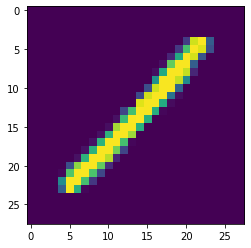

In [ ]:
idx = 12
image = np.array(images[idx,0].detach().cpu()) #연산에서 분리시키고 gpu에서 내려준다
label = labels[idx].item()
label
pred = predicted[idx].item()
pred

plt.imshow(image * 255) # 255로 나눴기 때문에 원래대로 돌려놓고
print('Label : ',label)
print('Predict : ',predicted)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


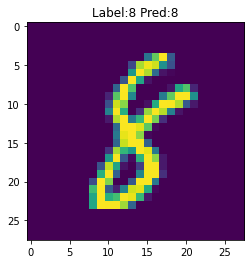

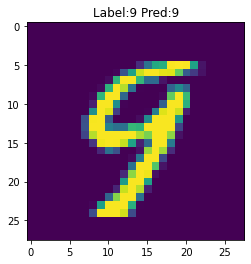

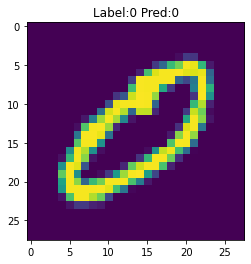

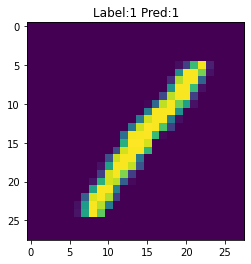

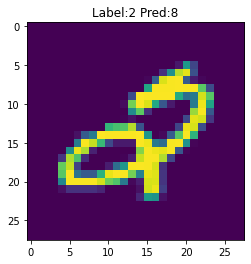

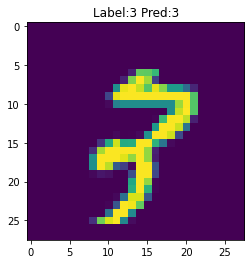

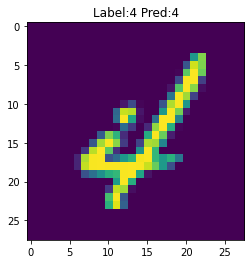

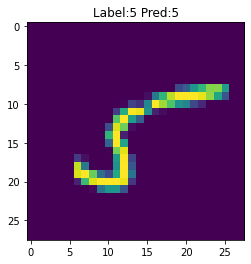

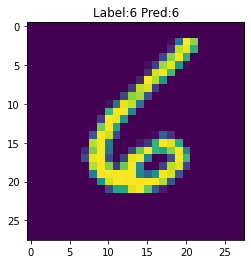

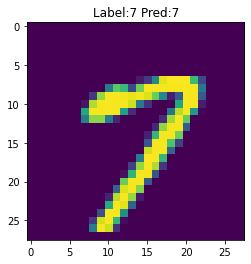

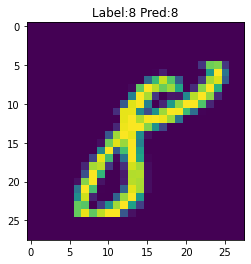

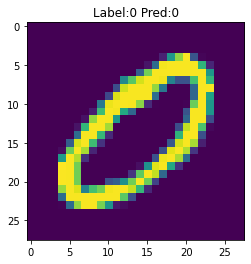

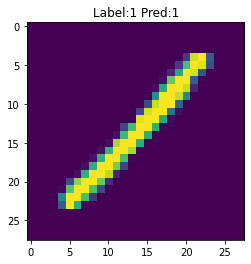

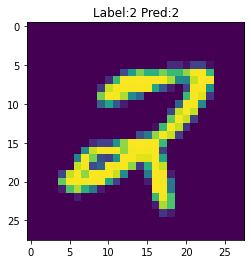

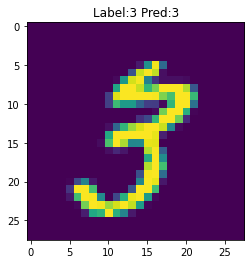

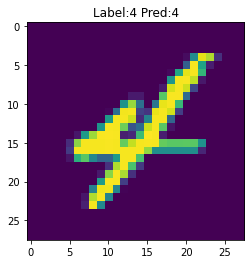

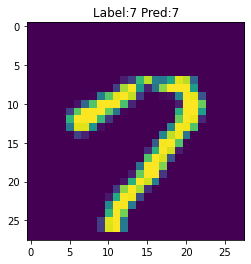

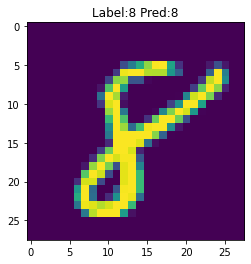

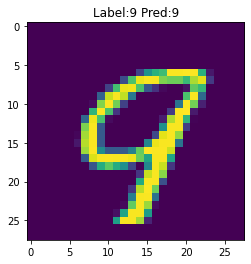

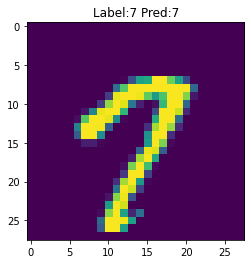

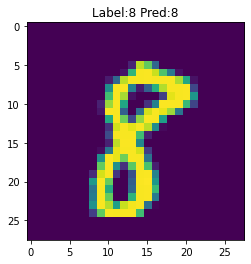

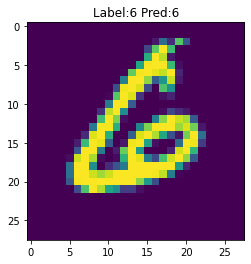

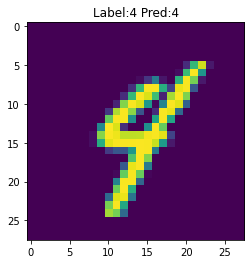

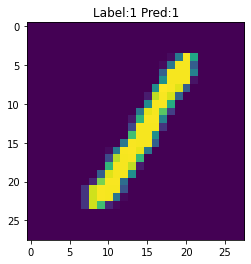

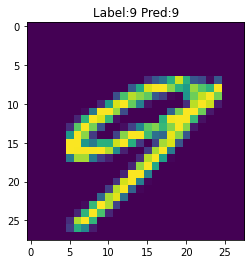

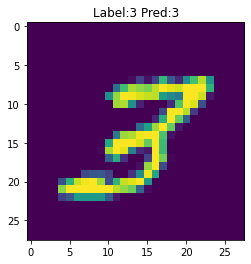

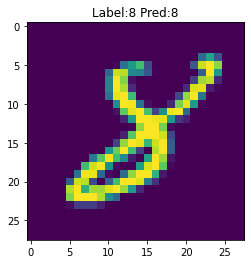

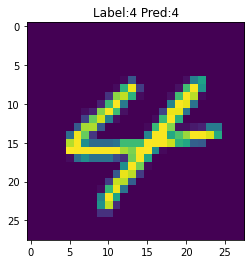

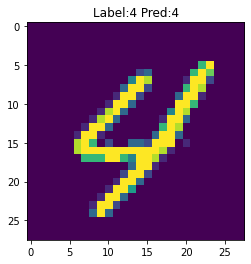

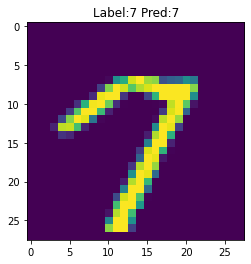

In [ ]:
for idx in range(30):
  image = np.array(images[idx,0].detach().cpu())
  label = labels[idx].item()
  pred = predicted[idx].item()
  plt.figure()
  plt.title(f'Label:{label} Pred:{pred}')
  plt.imshow(image * 255)

In [ ]:
import keras as k

In [ ]:
print("케라스 버전 = ", k.__version__)


케라스 버전 =  2.5.0
